# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [239]:
import os

if not os.path.exists('utils.py'):
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate
import utils

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

zsh:1: command not found: wget


In [240]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [241]:
G = nx.DiGraph()
G.add_node('John')
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
list(G.nodes())

['John', 'Alice', 'Bob', 'Chuck']

Here's how we add edges between nodes.

In [242]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.add_edge('John','Bob')
G.add_edge('John','Alice')
list(G.edges())

[('John', 'Bob'),
 ('John', 'Alice'),
 ('Alice', 'Bob'),
 ('Alice', 'Chuck'),
 ('Bob', 'Alice'),
 ('Bob', 'Chuck')]

And here's how to draw the graph.

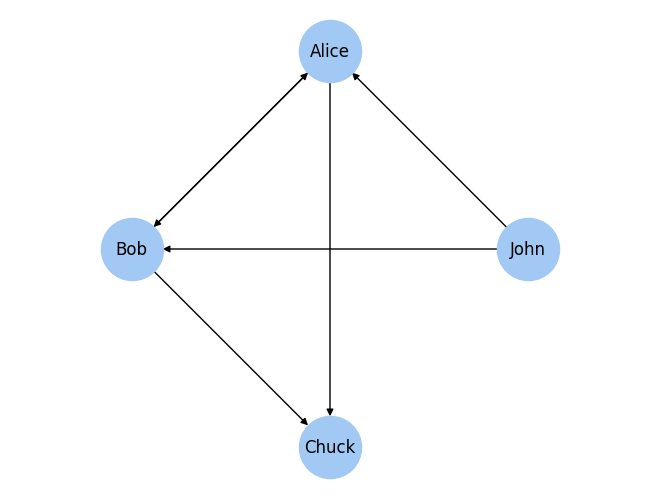

In [243]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.show('figs/chap03-1')

**Exercise:**  Add another node and a few more edges and draw the graph again.

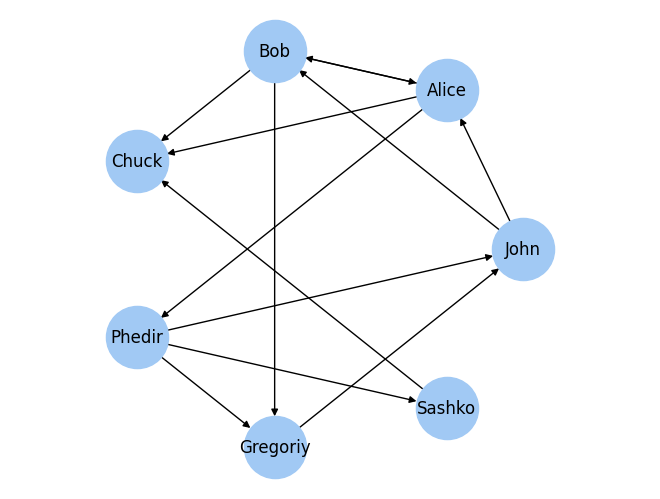

In [244]:
G.add_node('Phedir')
G.add_node('Gregoriy')
G.add_node('Sashko')
G.add_edge('Phedir', 'John')
G.add_edge('Phedir', 'Sashko')
G.add_edge('Sashko', 'Chuck')
G.add_edge('Gregoriy', 'John')
G.add_edge('Phedir', 'Gregoriy')
G.add_edge('Bob', 'Gregoriy')
G.add_edge('Alice', 'Phedir')
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
plt.show()

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [245]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions

{'Albany': (-74, 43),
 'Boston': (-71, 42),
 'NYC': (-74, 41),
 'Philly': (-75, 40)}

We can use the keys in `pos` to add nodes to the graph.

In [246]:
Gr = nx.Graph()
Gr.add_nodes_from(positions)
Gr.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [247]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [248]:
Gr.add_edges_from(drive_times)
Gr.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

Now we can draw the graph using `positions` to indicate the positions of the nodes, and `drive_times` to label the edges.

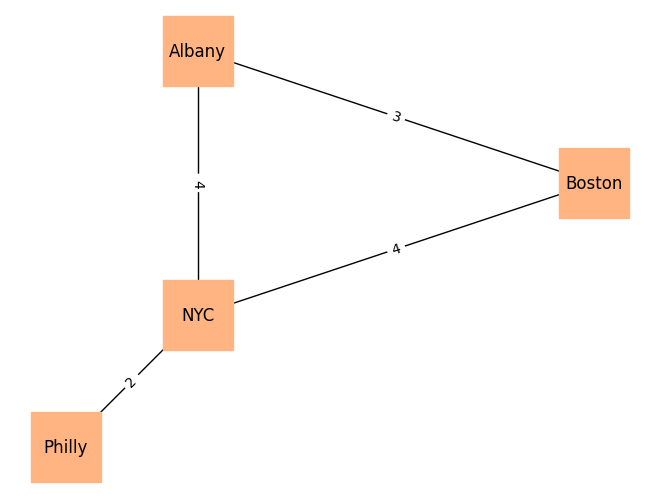

In [249]:
nx.draw(Gr, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
plt.show('figs/chap03-2')

**Exercise:**  Add another city and at least one edge.

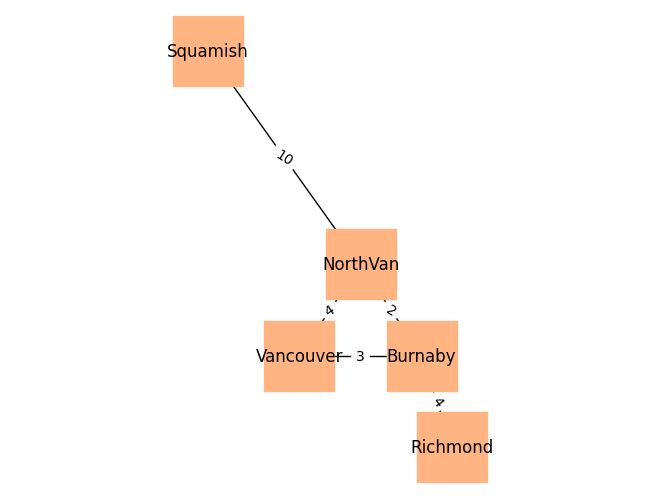

In [250]:
Gra = nx.Graph()
new_positions = dict(Vancouver=(0, 0),
                 Burnaby=(4, 0),
                 Squamish=(-3, 10),
                 NorthVan=(2, 3),
                 Richmond=(5,-3))
Gra.add_nodes_from(new_positions)
new_drive_times = {('Vancouver', 'Burnaby'): 3,
               ('Vancouver', 'NorthVan'): 4,
               ('Burnaby', 'Richmond'): 4,
               ('Burnaby', 'NorthVan'): 2,
               ('NorthVan', 'Squamish'): 10}
Gra.add_edges_from(new_drive_times)
nx.draw(Gra, new_positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(Gra, new_positions, 
                             edge_labels=new_drive_times)

plt.axis('equal')
plt.show('figs/chap03-2')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [ ]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

def comprehensible_all_pairs(nodes):
    return [(a,b) for a in nodes for b in nodes if b > a]

comprehensible_all_pairs(range(10))

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [252]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(comprehensible_all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [253]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

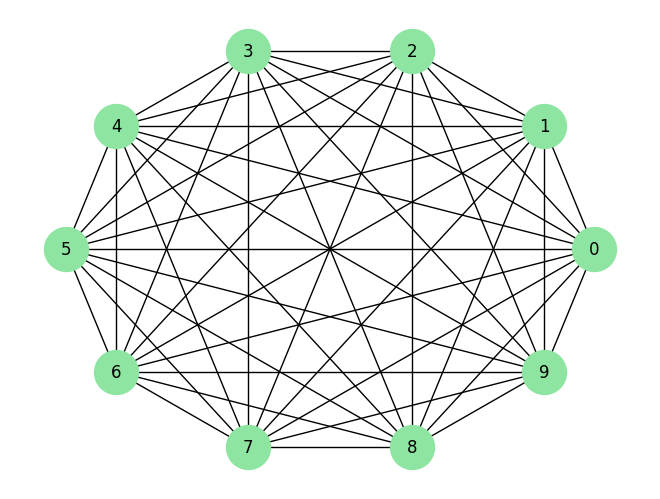

In [254]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
plt.show('figs/chap03-3')

The `neighbors` method the neighbors for a given node.

In [255]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

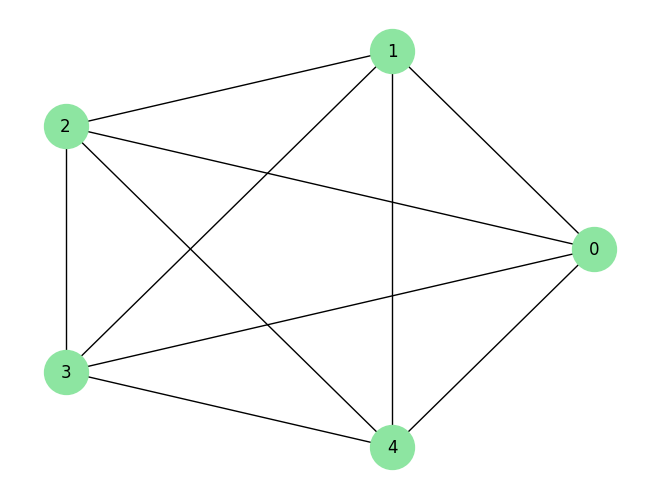

In [256]:
pentagram = make_complete_graph(5)
nx.draw_circular(pentagram, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
plt.show('figs/chap03-3')

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [257]:
def flip(p):
    return np.random.random() < p

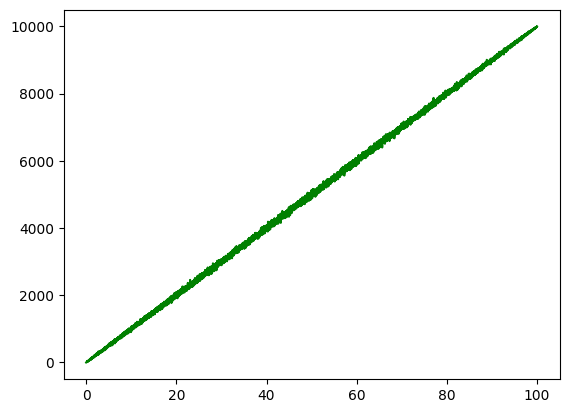

In [258]:
#I didnt get what you mean by 'and then plot a bar chart with the results', so I did graph wit x being p-probability and y being amount of True
size = 10000
xs = [i/100 for i in range(size)]
ys = [sum(1 for val in [flip(n/size) for i in range(size)] if val) for n in range(size)]
plt.plot(xs, ys, color='green')
plt.show('figs/chap02-5')

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [259]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [260]:
def random_pairs_two(nodes, p):
    return [(a,b) for (a,b) in comprehensible_all_pairs(nodes) if flip(p)]

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [283]:
def make_random_graph(n, p, seed=None):
    if not (type(seed) == None):
        np.random.seed(seed)
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs_two(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [286]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.6, seed=10)
len(random_graph.edges())

24

And here's what it looks like:

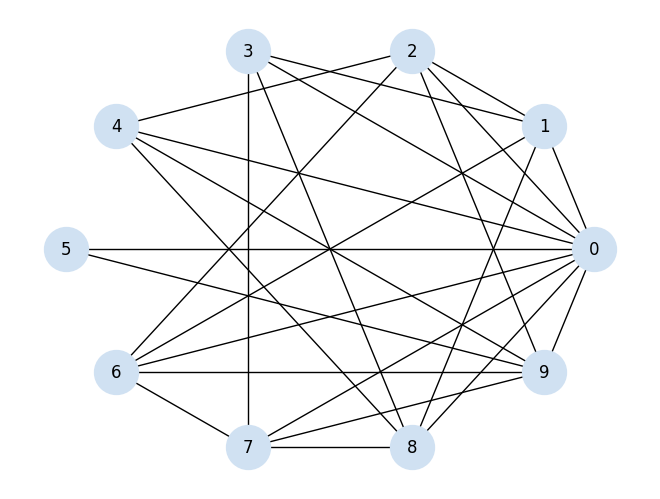

In [282]:
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
plt.show('figs/chap02-4')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [264]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [291]:
from timeit import timeit

timeit(lambda: reachable_nodes(make_complete_graph(n), 0), number=1)

0.05648861906956881

In [293]:
graph_sizes = [(i*10)+100 for i in range(190)]
timings = [timeit(lambda: reachable_nodes(make_complete_graph((i*10)+100), 0), number=1) for i in range(190)]

Text(0.5, 1.0, 'reachable_node Timings')

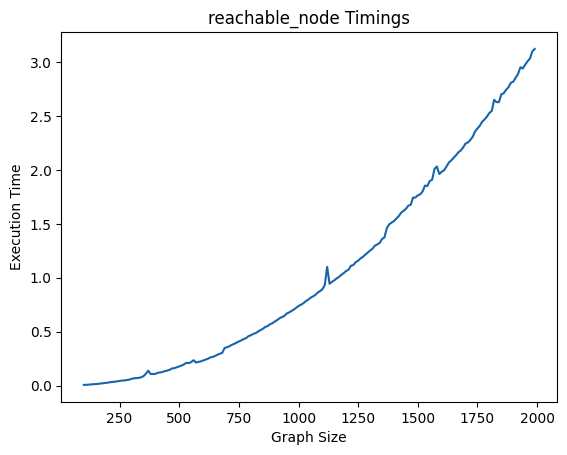

In [294]:
fig, ax = plt.subplots()
ax.plot(graph_sizes, timings)
ax.set_xlabel('Graph Size')
ax.set_ylabel('Execution Time')
ax.set_title('reachable_node Timings')

In the complete graph, starting from node 0, we can reach all nodes:

In [265]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [266]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [267]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [268]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [269]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [270]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [295]:
#directed graph is connected if all nodes can be reached by edges, no matter of their direction
def make_random_directed_graph(n, p):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G
#Because directed graph does not care about direction we can use the same functions for the test
is_connected(make_random_directed_graph(10,0.99))

True

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [296]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [297]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [274]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

0.3393

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [275]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [298]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

I'll estimate the probabilities with `iters=500`

In [301]:
ys = [prob_connected(n, p, 500) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 1.0
0.06760829753919818 1.0
0.09120108393559097 1.0
0.12302687708123815 1.0
0.16595869074375605 1.0
0.22387211385683395 1.0
0.3019951720402016 1.0
0.40738027780411273 1.0
0.5495408738576245 1.0
0.7413102413009173 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

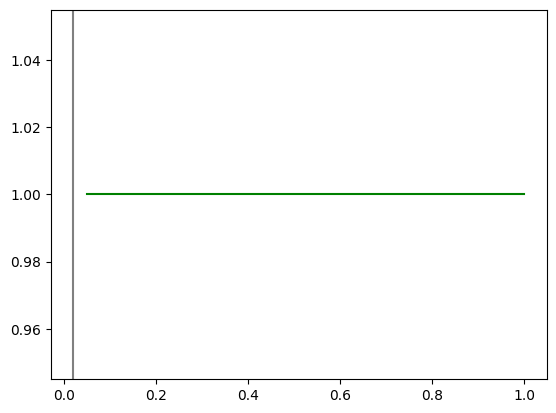

In [303]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
'''
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')
'''

plt.show('figs/chap02-5')

We can run the same analysis for a few more values of `n`.

300


KeyboardInterrupt: 

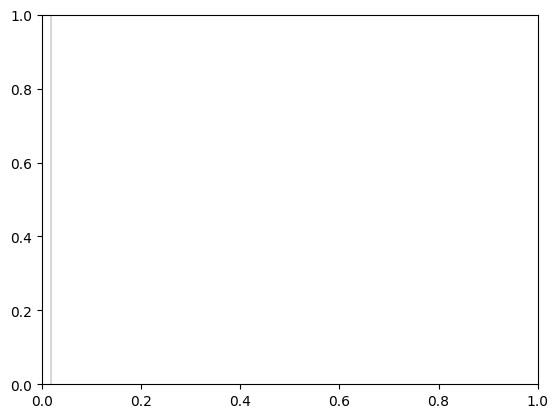

In [279]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

'''
decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]],
         loc='upper left')
'''

plt.show('figs/chap02-6')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = list(G)[0]
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [ ]:
# Solution goes here

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [ ]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return []

In [ ]:
# Solution goes here

In [ ]:
%timeit len(reachable_nodes(complete, 0))

In [ ]:
%timeit len(reachable_nodes_precheck(complete, 0))

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here